In [1]:
#Importing the reuired libraries.
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
#Reading the dataset file as ds
ds = pd.read_csv('IMDB Dataset.csv', encoding = 'latin',header=None)
ds.head()


,0,1
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
#changing the column names from 0 and 1 to text and sentiment
ds.columns = ['review', 'sentiment']
ds.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
#Summary of the dataset
ds.describe()


,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


Text(0.5, 1.0, 'Sentiment Data Distribution')

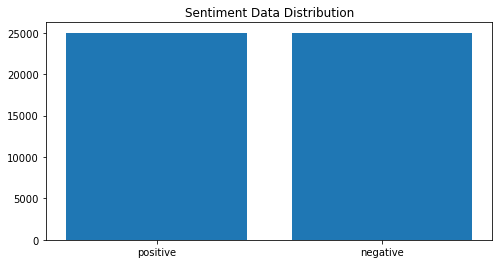

In [6]:
#plotting positive and negative words in a graph
val_count = ds.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")
#We can see that the dataset is balanced.

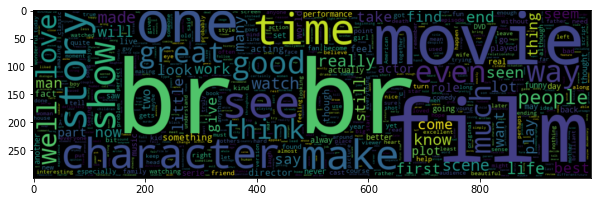

In [7]:
from wordcloud import WordCloud

plt.figure(figsize = (10,10)) 
wc = WordCloud(max_words = 2000 , width = 1000 , height = 300).generate(" ".join(ds[ds.sentiment == 'positive'].review))
plt.imshow(wc , interpolation = 'bilinear')

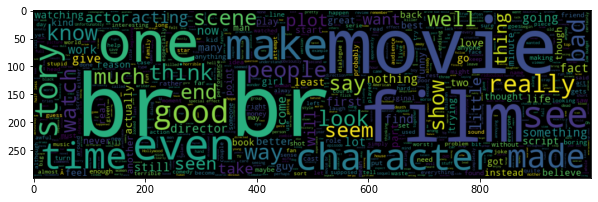

In [8]:
plt.figure(figsize = (10,10)) 
wc = WordCloud(max_words = 2000 , width = 1000 , height = 300).generate(" ".join(ds[ds.sentiment == 'negative'].review))
plt.imshow(wc , interpolation = 'bilinear')

In [9]:
#TFIDF vectorizer.
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1,2))
text_count_matrix = tfidf.fit_transform(ds.review)

In [10]:
##Data Preparation: Preprocessing
import re
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
lemmatizer = nltk.stem.WordNetLemmatizer()
#print(ds.review[4])

processed_review = []
single_review = "string to iniialize <br /> my email id is charilie@waoow.com. You can also reach to me at charlie's "
reviews = ds.review
for review in range(0,50000):
    single_review = ds.loc[review,'review']
    
    #start processing the single_review 
    #removing html tags:
    single_review = re.sub('<.*?>',' ',single_review)
    #removing special characters (punctuation) '@,!' e.t.c.
    single_review = re.sub('\W',' ',single_review)
    #removing single characters
    single_review = re.sub('\s+[a-zA-Z]\s+',' ', single_review)
    #substituting multiple spaces with single space
    single_review = re.sub('\s+',' ', single_review)
   
    #removing stop words
    #word_tokens = []
    word_tokens = word_tokenize(single_review)
    #lemmatization
    #lemmatized_sentence = " ".join(lemmatizer.lemmatize(token) for token in word_tokens if token not in stop_words)
    filtered_sentence = []
     #filtered_sentence.append([w for w in word_tokens if w not in stop_words])
    filtered_sentence2 = " ".join([w for w in word_tokens if w not in stop_words])
    
    
    #compile all the sentences to make a complete dictionary of processed reviews
    processed_review.append(filtered_sentence2)
    
print(processed_review[10])
#print(filtered_sentence2)

Phil Alien one quirky films humour based around oddness everything rather actual punchlines At first odd pretty funny movie progressed find jokes oddness funny anymore Its low budget film thats never problem pretty interesting characters eventually lost interest imagine film would appeal stoner currently partaking For something similar better try Brother another planet


In [11]:
#split the dataset  
#train dataset
train_reviews=ds.review[:40000]
train_sentiments=ds.sentiment[:40000]
#test dataset
test_reviews=ds.review[40000:]
test_sentiments=ds.sentiment[40000:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(40000,) (40000,)
(10000,) (10000,)


In [12]:
text_count_matrix2 = tfidf.fit_transform(processed_review)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_count_matrix2, ds.sentiment, test_size=0.20, random_state=2)
Y_train = (Y_train.replace({'positive': 1, 'negative': 0})).values
Y_test = (Y_test.replace({'positive': 1, 'negative': 0})).values

In [13]:
#Using Linear-SVC with preprocessed data 
from sklearn.svm import LinearSVC

In [14]:
LSVC = LinearSVC()
LSVC.fit(X_train, Y_train)
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
accuracy_score = metrics.accuracy_score(LSVC.predict(X_test), Y_test)
print("Linear SVC accuracy = " + str('{:04.2f}'.format(accuracy_score*100))+" %")
print("Classification Report: \n", classification_report(Y_test, LSVC.predict(X_test),target_names=['Negative','Positive']))
print("Confusion Matrix: \n", confusion_matrix(Y_test, LSVC.predict(X_test)))

Linear SVC accuracy = 91.41 %
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.92      0.90      0.91      4979
    Positive       0.91      0.93      0.92      5021

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

Confusion Matrix: 
 [[4492  487]
 [ 372 4649]]


In [15]:
from sklearn.linear_model import SGDClassifier
SGDC = SGDClassifier()
SGDC.fit(X_train, Y_train)
predict = SGDC.predict(X_test)
accuracy_score = metrics.accuracy_score(predict, Y_test)
print("Stocastic Gradient Classifier accuracy = " + str('{:04.2f}'.format(accuracy_score*100))+" %")
print("Classification Report: \n", classification_report(Y_test, predict,target_names=['Negative','Positive']))
print("Confusion Matrix: \n", confusion_matrix(Y_test, predict))

Stocastic Gradient Classifier accuracy = 90.21 %
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.92      0.88      0.90      4979
    Positive       0.89      0.92      0.90      5021

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Confusion Matrix: 
 [[4395  584]
 [ 395 4626]]


In [16]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, Y_train)
predict = LR.predict(X_test)
accuracy_score = metrics.accuracy_score(predict, Y_test)
print("LR = " + str('{:04.2f}'.format(accuracy_score*100))+" %")
print("Classification Report: \n", classification_report(Y_test, predict,target_names=['Negative','Positive']))
print("Confusion Matrix: \n", confusion_matrix(Y_test, predict))

LR = 90.19 %
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.91      0.89      0.90      4979
    Positive       0.89      0.92      0.90      5021

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Confusion Matrix: 
 [[4414  565]
 [ 416 4605]]
